#### 데이터 정리
- 라이다 포인트클라우드 데이터 - 100,000장
- 가공 데이터 - 100,000장
- 데이터 구성 비율
- training : validation : test = 8 : 1 : 1
- 분류: {1: car, 2: truck, 3: bus, 4: special_vehicle, 5: motorcycle, 6: bicycle, 7 :pedestrain}

아래에서 필요한 정보는
- Label, Position, Scale, Roation

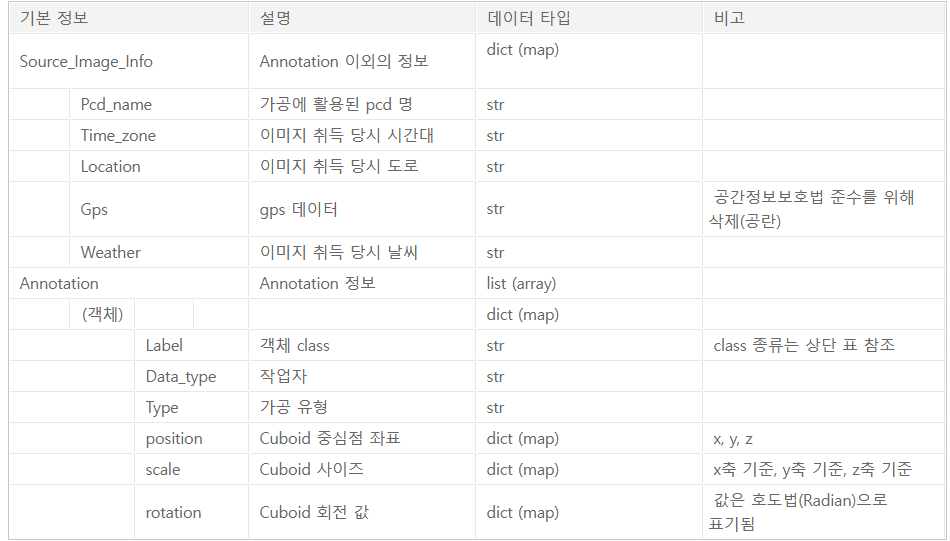

In [1]:
import os
from pypcd import pypcd 
# pip3 install --upgrade git+https://github.com/klintan/pypcd.git
import json

file_path = 'C:/DDrive/000_Dataset/3D_Bounding_Box/training'

for label_file_name in os.listdir(os.path.join(file_path, 'labels')):
    abs_label_file_name = os.path.join(file_path, 'labels', label_file_name)
    label_file = json.load(open('{}'.format(abs_label_file_name)))
    
    abs_pcd_file_name = os.path.join(file_path, 'pcd', label_file_name[:-5] +'.pcd')
    pcd_file = pypcd.PointCloud.from_path(abs_pcd_file_name)
    # pcd_file.pc_data: list of (x, y, z, ??)
    # pcd_file.pc_data.shape: (131072,)
    print('# of object: ', len(label_file['Annotation']))
    break

"""
이걸 바탕으로 dataset 클래스와 dataloader를 만들면 된다.
"""


# of object:  5


'\n이걸 바탕으로 dataset 클래스와 dataloader를 만들면 된다.\n'

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class PCDDataset(Dataset):
    def __init__(self, root_path):
        self.root_path = root_path
        self.abs_label_file_names = []
        self.abs_pcd_file_names = []

        for label_file_name in os.listdir(os.path.join(self.root_path, 'labels')):
            self.abs_label_file_names.append(os.path.join(root_path, 'labels', label_file_name))
            #label_file = json.load(open('{}'.format(abs_label_file_name)))
            
            self.abs_pcd_file_names.append(os.path.join(file_path, 'pcd', label_file_name[:-5] +'.pcd'))
            #pcd_file = pypcd.PointCloud.from_path(abs_pcd_file_name)
    
    def __len__(self):
        assert len(self.abs_label_file_names) == len(self.abs_pcd_file_names)
        return len(self.abs_label_file_names)
    
    def __getitem__(self, index):
        pcd = pypcd.PointCloud.from_path(self.abs_pcd_file_names[index])
        label = json.load(open('{}'.format(self.abs_label_file_names[index])))

        return pcd, label
        

train_dataloader = DataLoader()

In [ ]:
def filter_db(db_infos):
    """
    클래스 별로 GT를 나눈다.
    """
    # 1. filter_by_difficulty
    for k, v in db_infos.items(): # difficulty가 아닌것??
        db_infos[k] = [item for item in v if item['difficulty'] != -1]

    # 2. filter_by_min_points, dict(Car=5, Pedestrian=10, Cyclist=10)
    filter_thrs = dict(Car=5, Pedestrian=10, Cyclist=10)
    for cat in self.CLASSES:
        filter_thr = filter_thrs[cat] # gt에 담긴 points 중에 10개 이상인 것??
        db_infos[cat] = [item for item in db_infos[cat] if item['num_points_in_gt'] >= filter_thr]